# Exploring the reference database
Let's see what properties we can find :)

## Structure
In `genome/`, there's multiple sub-folder, we will start with `Bacteria`
It then contains all recorded species/strands in individual folders


## Content of each species/strand folder
In each folder there's:
- .ASN with 
 - `taxname "Acetobacter pasteurianus IFO 3283-32"`
 - `db "taxon", tag id 634457`
 - `genus "Acetobacter", species "pasteurianus"`
 - `mod { {subtype strain, subname "IFO 3283" }, { subtype substrain, subname "IFO 3283-32" } },`
 - `lineage "Bacteria; Proteobacteria; Alphaproteobacteria; Rhodospirillales; Acetobacteraceae; Acetobacter",`
- .FAA
 - with multiple ">gi|384064451|ref|YP_005479409.1| hypothetical protein APA32_44160 [Acetobacter pasteurianus IFO 3283-32]"
 - and probably the amino-acid sequence for each of these proteins
- .FFN
 - multiple ">gi|384064450|ref|NC_017102.1|:c562-116 Acetobacter pasteurianus IFO 3283-32 plasmid pAPA32-040, complete sequence"
 - probably DNA sequence
- .FNA
 - Also DNA
- .GBK : Human readable format with most info !
 - have an identifier `/db_xref="taxon:634457"`
- .GFF with `##species http://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=634457`
- .RPT
 - seem good with simple Python INI config file format: 
   - `DNA  length = 3035`
   - `Taxname: Acetobacter pasteurianus IFO 3283-32`
   - `Taxid: 634457`


http://defindit.com/readme_files/ncbi_file_extension_format.html

What we need is the taxo id, name, and the DNA, which can be found in:
 - .gbk for the taxo and name
 - .fna for the sequence

#### File marker
https://www.ncbi.nlm.nih.gov/books/NBK21091/table/ch18.T.refseq_accession_numbers_and_mole/?report=objectonly <br>
`NC_	Genomic	Complete genomic molecule, usually reference assembly`

#### Status
https://www.ncbi.nlm.nih.gov/books/NBK21091/table/ch18.T.refseq_status_codes/?report=objectonly <br>
in `COMMENT` : VALIDATED > REVIEWED > PROVISIONAL > ...


## Coding
### Import and Paths

In [93]:
import os
import pandas as pd
import numpy as np
import configparser
import pickle
from Bio import SeqIO
from time import time
from tqdm import tqdm_notebook as tqdm

In [3]:
path_ref_db = "/mnt/genomeDB/ncbi/genomes/Bacteria/"
path_kmer_freq = "/home/sjriondet/Data/Kmer_frequencies/"

In [4]:
os.chdir(path_ref_db)

## Functions

## Tests

In [8]:
path_4mer = "4/"
path_4mer = os.path.join(path_kmer_freq, path_4mer)

In [17]:
names = []
counts = []
for f in os.scandir(path_4mer):
    if f.name.endswith(".pkl"):
        with open(f, 'rb') as file:
            names.append(os.path.splitext(f.name)[0])
            counts.append(pickle.load(file))

In [18]:
len(counts)

2375

In [19]:
df = pd.DataFrame(counts, index=names)

In [20]:
df

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
706587,0.873629,0.548444,0.736027,0.707273,0.498280,0.484682,0.472965,0.388785,0.808673,0.591161,...,0.742827,0.794872,0.662633,0.651706,0.498503,0.508904,0.305192,0.993019,0.685621,0.879882
1093787,0.062950,0.072922,0.071107,0.053160,0.136010,0.152834,0.177167,0.127585,0.120879,0.202986,...,0.304311,0.126712,0.115868,0.216052,0.121104,0.085019,0.017334,0.142707,0.039956,0.063313
709991,1.000000,0.458767,0.578649,0.715222,0.379414,0.310858,0.286882,0.263166,0.430323,0.318665,...,0.383413,0.454960,0.356620,0.306077,0.290620,0.387308,0.548048,0.710684,0.479892,0.985204
299768,1.000000,0.464016,0.594796,0.716386,0.435905,0.306295,0.232446,0.417401,0.643582,0.365357,...,0.189215,0.513763,0.659454,0.322000,0.447809,0.416232,0.586567,0.568648,0.586275,0.968130
272557,0.141588,0.199981,0.189243,0.101677,0.245118,0.337150,0.188293,0.166627,0.278472,0.367986,...,0.186963,0.332256,0.264836,0.179408,0.184397,0.216800,0.204685,0.182354,0.136979,0.159548
525897,0.526291,0.256565,0.330865,0.320896,0.229894,0.254371,0.264883,0.181526,0.348935,0.367461,...,0.426015,0.306996,0.351693,0.355385,0.301979,0.241057,0.125252,0.472015,0.328845,0.549508
662947,1.000000,0.439013,0.431381,0.477310,0.411854,0.218647,0.076595,0.398859,0.310300,0.218509,...,0.031078,0.242506,0.386414,0.196507,0.193619,0.309956,0.621562,0.288848,0.390539,0.919348
745776,0.144723,0.151783,0.162019,0.105189,0.218849,0.247441,0.267914,0.185669,0.257324,0.314508,...,0.306389,0.229086,0.200494,0.236851,0.188493,0.108366,0.062478,0.182139,0.133427,0.135192
1267577,0.892278,0.284325,0.331211,0.722447,0.307479,0.131628,0.065756,0.251621,0.361658,0.163348,...,0.062978,0.445531,0.308000,0.219843,0.211507,0.321255,0.664100,0.368199,0.411206,1.000000
224308,0.986095,0.451445,0.547814,0.585039,0.385316,0.211423,0.268926,0.190003,0.437009,0.455002,...,0.248471,0.450109,0.449611,0.331483,0.236304,0.354979,0.476986,0.603080,0.512907,1.000000


In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [98]:
pca = PCA(n_components=20)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

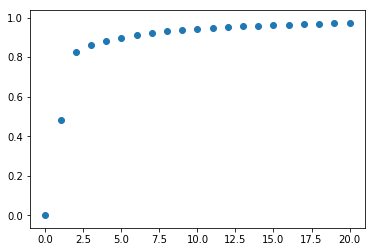

captured by PCA: 97.3%


In [99]:
plt.scatter(x=range(len(pca.explained_variance_ratio_)+1), 
            y=np.insert(pca.explained_variance_ratio_.cumsum(), 0, 0))
# plt.plot(pca.explained_variance_ratio_)
plt.show()
print(f"captured by PCA: {sum(pca.explained_variance_ratio_)*100:0.1f}%")

In [100]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [101]:
t2 = pca.transform(df)

In [102]:
df_2 = pd.DataFrame(t2, index=names, columns=["pca_1", "pca_2"])

In [103]:
df_2

,pca_1,pca_2
706587,2.875570,2.752865
1093787,1.435827,-2.538971
709991,-0.500197,0.974423
299768,-1.167078,1.484906
272557,1.119039,-0.558542
525897,2.281074,-0.678641
662947,-2.524738,-0.318392
745776,2.602454,-1.408059
1267577,-2.540075,0.203939
224308,-0.657203,0.546649


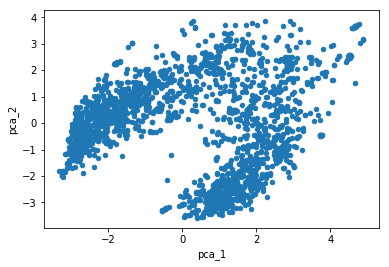

In [105]:
df_2.plot.scatter(x="pca_1", y="pca_2")
plt.show()

## Machine Learning classification

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def scale_minmax(df, single_col=False):
    df = df + 1
    df = df.apply(np.log2)
    if single_col:
        return MinMaxScaler().fit_transform(df.values.reshape(-1, 1))
    else:
        return MinMaxScaler().fit_transform(df)

In [ ]:
def error_and_corr(model, display=True, re_val=False):
    prediction = model.predict(X_test)
    pearson = np.corrcoef(prediction, y_test)[0, 1]
    mean_square_err = mean_squared_error(y_test, prediction)
    if re_val:
        return pearson, mean_square_err
    if display:
        print(f"Pearson correlation\t: *{pearson:.3f}*")
        print(f"Mean squared error\t: {mean_square_err:.3f}")
    return prediction

In [ ]:
def some_predictions(pred):
    print("Expected values \t: " + "\t".join([f"{n:.2f}" for n in y_test[:10]]))
    print("Predicted values \t: " + "\t".join([f"{n:.2f}" for n in pred[:10]]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, ic50, test_size=0.1, random_state=0)

In [ ]:
verbose = True

In [ ]:
def linReg():
    if verbose:  print("Linear Regression")
    l_regr = linear_model.LinearRegression()
    l_regr.fit(X_train, y_train)
    return l_regr

In [ ]:
l_regr = linReg()
pred = error_and_corr(l_regr)
some_predictions(pred)

In [ ]:
def randForest():
    if verbose:  print("Random Forest Regression")
    rf_regr = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=100, n_jobs=6)
    rf_regr.fit(X_train, y_train)
    return rf_regr

In [ ]:
rf_regr = randForest()
rf_pred = error_and_corr(rf_regr)
some_predictions(rf_pred)

In [ ]:
def svr():
    if verbose:  print("Support Vector Machine regression")
    svr_rbf = SVR(kernel='rbf', gamma='auto', cache_size=1000)
    svr_rbf.fit(X_train, y_train)
    return svr_rbf

In [ ]:
svr_rbf = svr()
svr_pred = error_and_corr(svr_rbf)
some_predictions(svr_pred)

In [ ]:
def k_neigh():
    if verbose:  print("K neighbours")
    neigh = KNeighborsRegressor(n_neighbors=20, n_jobs=6)
    neigh.fit(X_train, y_train)
    return neigh

In [ ]:
neigh = k_neigh()
n_pred = error_and_corr(neigh)
some_predictions(n_pred)

In [ ]:
def elas_net():
    if verbose:  print("Elastic Net")
    elastic_net = ElasticNet(l1_ratio=0.5, random_state=0)
    elastic_net.fit(X_train, y_train)
    return elastic_net

In [ ]:
e_net = elas_net()
e_pred = error_and_corr(e_net)
some_predictions(e_pred)

In [ ]:
def nn():
    if verbose:  print("Neural Network")
    nnm = MLPRegressor(hidden_layer_sizes=(100,100,), verbose=False, tol=0.000100)
    nnm.fit(X_train, y_train)
    return nnm

In [ ]:
nn_m = nn()
nn_pred = error_and_corr(nn_m)
some_predictions(nn_pred)

In [ ]:
models = [linReg, randForest, svr, k_neigh, elas_net, nn]

In [ ]:
results = {}
for model in tqdm(models):
    print("******************************************")
    m = model()
    pred = error_and_corr(m)
    # some_predictions(pred)
    pearson, err = error_and_corr(m, re_val=True)
    results[model.__name__] = {"pearson": pearson, "err": err}

In [ ]:
pred = error_and_corr(models[1](), display=False)

In [ ]:
pd.DataFrame([pred, y_test.values])

In [ ]:
from datetime import datetime
file_results = "results.csv"
file_results = osp.join(folder, file_results)

In [ ]:
with open(file_results, "a") as f:
    f.write(str(datetime.now())[:16] + "," + str(param) + "," + "\n")
    f.write(",".join(results.keys()) + "\n")
    f.write(",".join([f"{v['pearson']:.3f}" for v in results.values()]) + "\n")
    f.write(",".join([f"{v['err']:.3f}" for v in results.values()]) + "\n")
    print(f"Results written in {file_results}")



### End of the script.
Sylvain @GIS

## Keep other methods

In [11]:
def window(fseq, window_size=53):
    for i in range(len(fseq) - window_size + 1):
        yield fseq[i:i+window_size]

In [23]:
def kmer_pkl_path(k, fna_path):
    path_gbk = fna_path.replace(".fna", ".gbk")
    assert os.path.isfile(path_gbk), f"{fna_path} DOESN'T have a .gbk file ??"
    
    with open(path_gbk) as gbk:
        description=gbk.read()  #.replace('\n', '')
        
    identificator = 'db_xref="taxon:'
    taxo_start = description.find(identificator)
    taxo = description[taxo_start+len(identificator):
                       taxo_start+description[taxo_start:].find('"\n')]
    assert len(taxo) < 10, f"The taxo id search failed, found an id of length {len(taxo)}..."
    
    # TODO: ADD full path of the original file in the file name, or maybe in the .pkl
    
    return os.path.join(path_kmer_freq, str(k), taxo + ".pkl")

In [24]:
def kmer_freq_to_file(kmer_dic, freq_path):
    with open(freq_path, 'wb') as f_out:
        pickle.dump(kmer_dic, f_out)